Environment Setup and Data Loading

In [ ]:
# Installing necessary libraries
!pip install torch torchvision torchaudio opencv-python matplotlib seaborn scikit-learn kaggle kagglehub

# Importing necessary libraries
import os
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

# Checking GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device being used: {device}")

# Downloading Drone vs Bird dataset from Kaggle
path = kagglehub.dataset_download("muhammadsaoodsarwar/drone-vs-bird")
print(f"Dataset files path: {path}")

# Checking the structure of downloaded data
!ls -la {path}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 1.59G/1.59G [01:12<00:00, 23.6MB/s]

Extracting files...


Шлях до файлів датасету: /root/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1
total 12
drwxr-xr-x 3 root root 4096 Mar 30 09:20 .
drwxr-xr-x 3 root root 4096 Mar 30 09:20 ..
drwxr-xr-x 4 root root 4096 Mar 30 09:20 dataset


Exploring Dataset Structure

Кількість зображень дронів: 2499
Кількість зображень птахів: 1607
Загальна кількість зображень: 4106


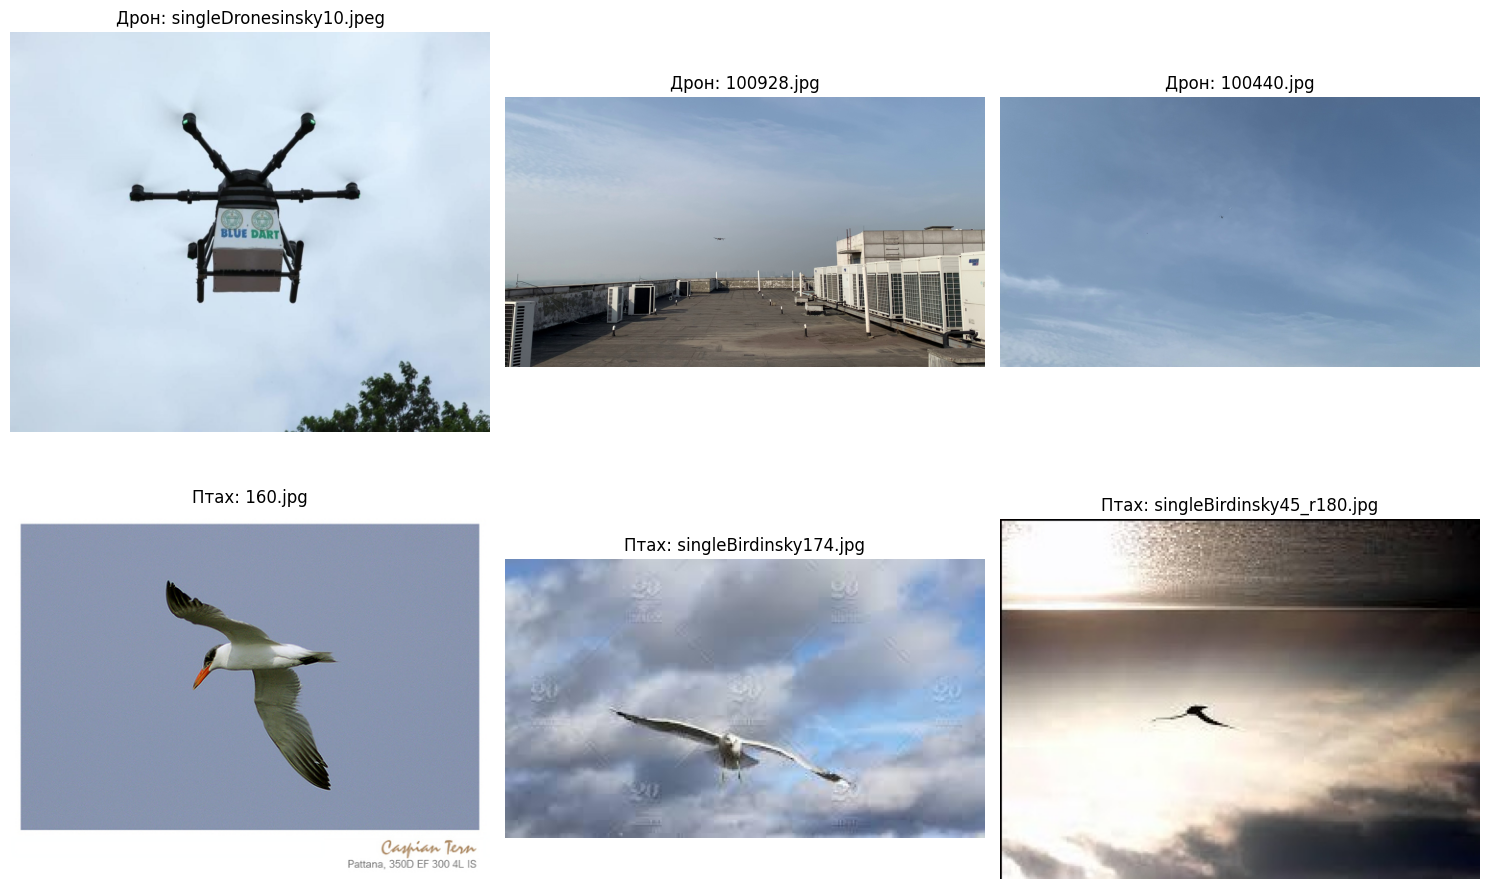


Розміри зображень дронів (ширина x висота):
Зображення 1: 3840 x 2160
Зображення 2: 550 x 309
Зображення 3: 3840 x 2160
Зображення 4: 1280 x 720
Зображення 5: 1280 x 720
Зображення 6: 1920 x 1080
Зображення 7: 1280 x 720
Зображення 8: 1920 x 1080
Зображення 9: 4032 x 3024
Зображення 10: 1920 x 1080

Розміри зображень птахів (ширина x висота):
Зображення 1: 268 x 188
Зображення 2: 209 x 160
Зображення 3: 275 x 183
Зображення 4: 275 x 183
Зображення 5: 267 x 188
Зображення 6: 366 x 550
Зображення 7: 264 x 191
Зображення 8: 177 x 285
Зображення 9: 500 x 332
Зображення 10: 263 x 192


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset"

# Paths to class folders
drone_path = os.path.join(dataset_path, "drone")
bird_path = os.path.join(dataset_path, "bird")

# Checking the number of images in each class
drone_images = os.listdir(drone_path)
bird_images = os.listdir(bird_path)

print(f"Number of drone images: {len(drone_images)}")
print(f"Number of bird images: {len(bird_images)}")
print(f"Total number of images: {len(drone_images) + len(bird_images)}")

# Displaying example images
plt.figure(figsize=(15, 10))

# Drone examples
num_examples = 3
drone_samples = random.sample(drone_images, min(num_examples, len(drone_images)))

for i, img_name in enumerate(drone_samples):
    img_path = os.path.join(drone_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(img)
        plt.title(f"Drone: {img_name}")
        plt.axis('off')

# Bird examples
bird_samples = random.sample(bird_images, min(num_examples, len(bird_images)))

for i, img_name in enumerate(bird_samples):
    img_path = os.path.join(bird_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_examples, i + num_examples + 1)
        plt.imshow(img)
        plt.title(f"Bird: {img_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()

# Analysis of image dimensions
drone_sizes = []
bird_sizes = []

# Checking dimensions for 10 random images of each class
for img_name in random.sample(drone_images, min(10, len(drone_images))):
    img_path = os.path.join(drone_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        drone_sizes.append((w, h))

for img_name in random.sample(bird_images, min(10, len(bird_images))):
    img_path = os.path.join(bird_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        bird_sizes.append((w, h))

print("\nDrone image dimensions (width x height):")
for i, size in enumerate(drone_sizes):
    print(f"Image {i+1}: {size[0]} x {size[1]}")

print("\nBird image dimensions (width x height):")
for i, size in enumerate(bird_sizes):
    print(f"Image {i+1}: {size[0]} x {size[1]}")

Data Preparation for Training

Розмір тренувального набору: 2627
Розмір валідаційного набору: 657
Розмір тестового набору: 822
Приклади трансформованих зображень з тренувальної вибірки:


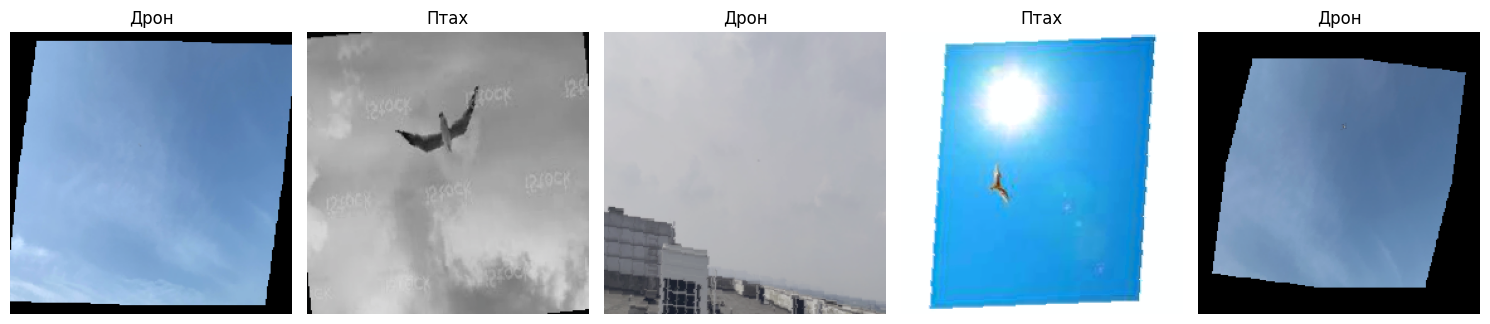


Баланс класів у тренувальній вибірці:
Клас 'Птах' (0): 1028 зображень (39.13%)
Клас 'Дрон' (1): 1599 зображень (60.87%)

Баланс класів у валідаційній вибірці:
Клас 'Птах' (0): 257 зображень (39.12%)
Клас 'Дрон' (1): 400 зображень (60.88%)

Баланс класів у тестовій вибірці:
Клас 'Птах' (0): 322 зображень (39.17%)
Клас 'Дрон' (1): 500 зображень (60.83%)


In [ ]:
# -*- coding: utf-8 -*-
"""birds_vs_drone.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1zE7tyHZLXv9Kdk4PTcl7j9DXRhgOqKhj

Environment Setup and Data Loading
"""

# Installing necessary libraries
!pip install torch torchvision torchaudio opencv-python matplotlib seaborn scikit-learn kaggle kagglehub

# Importing necessary libraries
import os
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

# Checking GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device being used: {device}")

# Downloading Drone vs Bird dataset from Kaggle
path = kagglehub.dataset_download("muhammadsaoodsarwar/drone-vs-bird")
print(f"Dataset files path: {path}")

# Checking the structure of downloaded data
!ls -la {path}

"""Exploring Dataset Structure"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset"

# Paths to class folders
drone_path = os.path.join(dataset_path, "drone")
bird_path = os.path.join(dataset_path, "bird")

# Checking the number of images in each class
drone_images = os.listdir(drone_path)
bird_images = os.listdir(bird_path)

print(f"Number of drone images: {len(drone_images)}")
print(f"Number of bird images: {len(bird_images)}")
print(f"Total number of images: {len(drone_images) + len(bird_images)}")

# Displaying example images
plt.figure(figsize=(15, 10))

# Drone examples
num_examples = 3
drone_samples = random.sample(drone_images, min(num_examples, len(drone_images)))

for i, img_name in enumerate(drone_samples):
    img_path = os.path.join(drone_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(img)
        plt.title(f"Drone: {img_name}")
        plt.axis('off')

# Bird examples
bird_samples = random.sample(bird_images, min(num_examples, len(bird_images)))

for i, img_name in enumerate(bird_samples):
    img_path = os.path.join(bird_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_examples, i + num_examples + 1)
        plt.imshow(img)
        plt.title(f"Bird: {img_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()

# Analysis of image dimensions
drone_sizes = []
bird_sizes = []

# Checking dimensions for 10 random images of each class
for img_name in random.sample(drone_images, min(10, len(drone_images))):
    img_path = os.path.join(drone_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        drone_sizes.append((w, h))

for img_name in random.sample(bird_images, min(10, len(bird_images))):
    img_path = os.path.join(bird_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        bird_sizes.append((w, h))

print("\nDrone image dimensions (width x height):")
for i, size in enumerate(drone_sizes):
    print(f"Image {i+1}: {size[0]} x {size[1]}")

print("\nBird image dimensions (width x height):")
for i, size in enumerate(bird_sizes):
    print(f"Image {i+1}: {size[0]} x {size[1]}")

"""Data Preparation for Training

"""

import os
import torch
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset"
drone_path = os.path.join(dataset_path, "drone")
bird_path = os.path.join(dataset_path, "bird")

# Define transformations for images
# Considering different sizes, we'll resize all to the same dimensions
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to standard size (224x224)
    transforms.RandomHorizontalFlip(),  # Random horizontal flipping
    transforms.RandomRotation(10),  # Random rotation within 10 degrees
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # Random affine transformations
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Color adjustments
    transforms.ToTensor(),  # Converting to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization (ImageNet statistics)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Creating a custom dataset class
class DroneVsBirdDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Function to load paths and labels
def load_data_paths():
    drone_images = [os.path.join(drone_path, img) for img in os.listdir(drone_path)]
    bird_images = [os.path.join(bird_path, img) for img in os.listdir(bird_path)]

    all_images = drone_images + bird_images
    all_labels = [1] * len(drone_images) + [0] * len(bird_images)  # 1 for drones, 0 for birds

    return all_images, all_labels

# Loading paths and labels
all_image_paths, all_labels = load_data_paths()

# Splitting the dataset into training, validation, and test sets
# First setting aside 20% for testing
train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Then setting aside 20% of training data for validation (which will be 16% of total)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels, test_size=0.2, random_state=42, stratify=train_val_labels
)

# Displaying information about dataset sizes
print(f"Training set size: {len(train_paths)}")
print(f"Validation set size: {len(val_paths)}")
print(f"Test set size: {len(test_paths)}")

# Creating datasets
train_dataset = DroneVsBirdDataset(train_paths, train_labels, transform=train_transforms)
val_dataset = DroneVsBirdDataset(val_paths, val_labels, transform=val_test_transforms)
test_dataset = DroneVsBirdDataset(test_paths, test_labels, transform=val_test_transforms)

# Creating data loaders with shuffling for the training set
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Displaying examples of images after transformations
def show_transformed_images(dataloader, num_images=5):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    label_map = {0: "Bird", 1: "Drone"}

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i].permute(1, 2, 0).cpu().numpy()
        # Denormalizing image for display
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(f"{label_map[labels[i].item()]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Displaying examples of transformed images
print("Examples of transformed images from the training set:")
show_transformed_images(train_loader)

# Checking class balance in the sets
def check_class_balance(labels, set_name):
    unique, counts = np.unique(labels, return_counts=True)
    class_counts = dict(zip(unique, counts))

    print(f"\nClass balance in the {set_name} set:")
    print(f"Class 'Bird' (0): {class_counts.get(0, 0)} images ({class_counts.get(0, 0) / len(labels) * 100:.2f}%)")
    print(f"Class 'Drone' (1): {class_counts.get(1, 0)} images ({class_counts.get(1, 0) / len(labels) * 100:.2f}%)")

# Checking class balance
check_class_balance(train_labels, "training")
check_class_balance(val_labels, "validation")
check_class_balance(test_labels, "test")

Model Creation and Training

Використовується пристрій: cuda


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.0MB/s]


Епоха 1/15
----------


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


train Втрати: 0.1613 Точність: 0.9307
val Втрати: 0.0349 Точність: 0.9863

Епоха 2/15
----------
train Втрати: 0.0529 Точність: 0.9825
val Втрати: 0.0210 Точність: 0.9954

Епоха 3/15
----------
train Втрати: 0.0446 Точність: 0.9848
val Втрати: 0.0246 Точність: 0.9954

Епоха 4/15
----------
train Втрати: 0.0346 Точність: 0.9897
val Втрати: 0.0267 Точність: 0.9924

Епоха 5/15
----------
train Втрати: 0.0174 Точність: 0.9943
val Втрати: 0.0330 Точність: 0.9939

Епоха 6/15
----------
train Втрати: 0.0271 Точність: 0.9905
val Втрати: 0.0308 Точність: 0.9939

Епоха 7/15
----------
train Втрати: 0.0233 Точність: 0.9931
val Втрати: 0.0475 Точність: 0.9893

Епоха 8/15
----------
train Втрати: 0.0182 Точність: 0.9939
val Втрати: 0.0369 Точність: 0.9909

Епоха 9/15
----------
train Втрати: 0.0179 Точність: 0.9947
val Втрати: 0.0216 Точність: 0.9954

Епоха 10/15
----------
train Втрати: 0.0089 Точність: 0.9966
val Втрати: 0.0253 Точність: 0.9954

Епоха 11/15
----------
train Втрати: 0.0156 Точніст

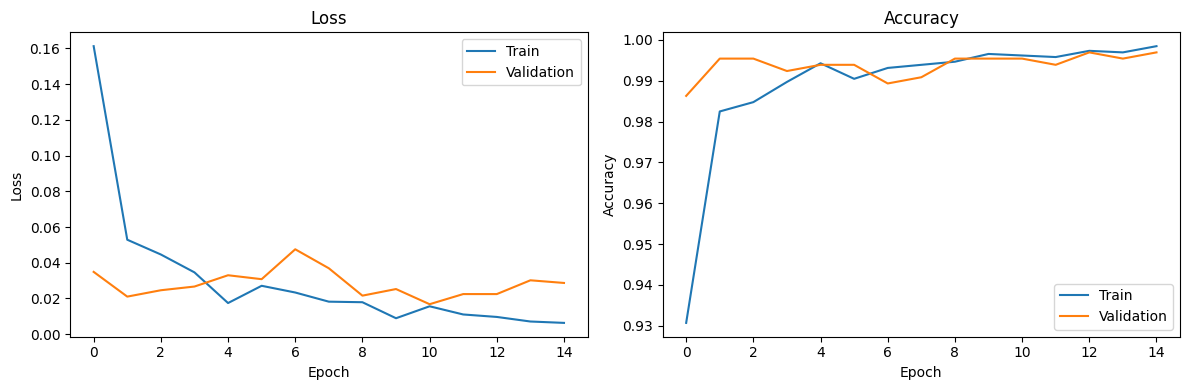

Тестові втрати: 0.0461 Точність: 0.9939

Confusion Matrix:
[[322   0]
 [  5 495]]

Звіт про класифікацію:
              precision    recall  f1-score   support

        Птах     0.9847    1.0000    0.9923       322
        Дрон     1.0000    0.9900    0.9950       500

    accuracy                         0.9939       822
   macro avg     0.9924    0.9950    0.9936       822
weighted avg     0.9940    0.9939    0.9939       822



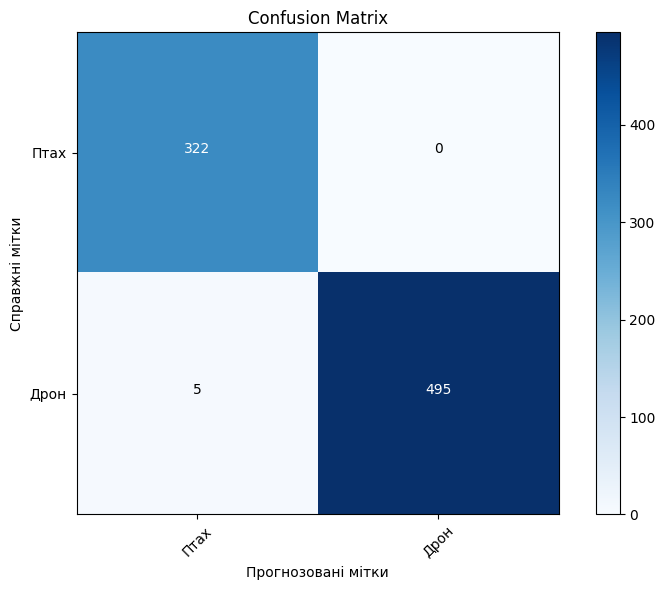

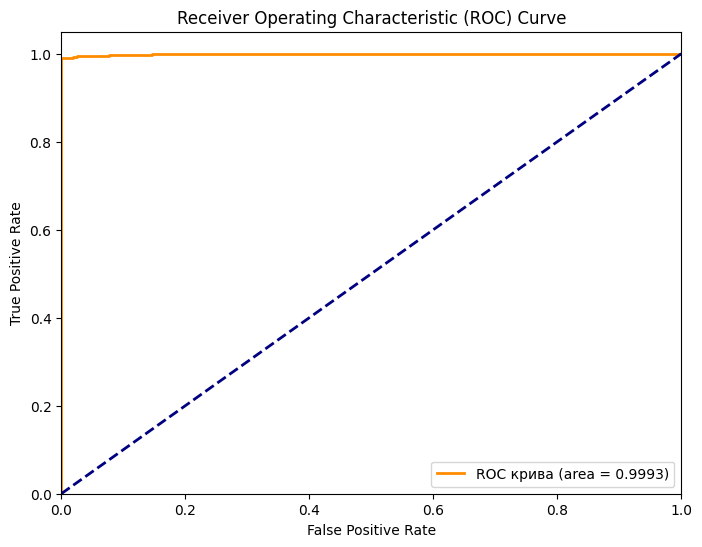

Модель збережено як 'drone_vs_bird_model.pth'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time
import copy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Checking GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device being used: {device}")

# Loading pre-trained ResNet-18 model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modifying the last layer for our binary classification task
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)  # 2 classes: bird and drone
)

# Moving the model to GPU if available
model = model.to(device)

# Setting up loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Using different learning rates for different layers
# Freezing weights of pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Unfreezing the last few layers for fine-tuning
for param in model.layer4.parameters():
    param.requires_grad = True

# Also unfreezing our new classification layer
for param in model.fc.parameters():
    param.requires_grad = True

# Defining optimizer for training unfrozen layers
optimizer = optim.Adam([
    {'params': model.layer4.parameters(), 'lr': 1e-4},
    {'params': model.fc.parameters(), 'lr': 1e-3}
])

# Using learning rate scheduler to reduce LR during stagnation
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Function for model training
def train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # For tracking metrics during training
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has training and validation phases
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Training mode
            else:
                model.eval()   # Evaluation mode

            running_loss = 0.0
            running_corrects = 0

            # Iterating through data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero parameter gradients
                optimizer.zero_grad()

                # Forward pass
                # Track history only in training mode
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only in training mode
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}')

            # Recording statistics
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())
                # Updating learning rate scheduler
                scheduler.step(epoch_loss)

            # Saving the model with the best validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training completed in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation accuracy: {best_acc:.4f}')

    # Loading the weights of the best model
    model.load_state_dict(best_model_wts)
    return model, history

# Function for visualizing the training process
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train')
    plt.plot(history['val_acc'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function for evaluating the model on the test set
def evaluate_model(model, dataloader, dataset_size):
    model.eval()

    running_loss = 0.0
    running_corrects = 0

    # For storing labels and predictions for confusion matrix
    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            probs = torch.nn.functional.softmax(outputs, dim=1)

            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Saving for further analysis
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs[:,1].cpu().numpy())  # Probabilities for "drone" class (index 1)

    test_loss = running_loss / dataset_size
    test_acc = running_corrects.double() / dataset_size

    print(f'Test Loss: {test_loss:.4f} Accuracy: {test_acc:.4f}')

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)

    # Detailed classification report
    target_names = ['Bird', 'Drone']
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=target_names, digits=4))

    # Visualizing the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    # Adding quantity labels
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.tight_layout()
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return test_acc, all_labels, all_preds, all_probs

# Configuration and training launch
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

# Training the model
num_epochs = 15  # Can be increased for better results
model, history = train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, num_epochs=num_epochs)

# Visualizing the training process
plot_training_history(history)

# Evaluating the model on the test set
test_acc, test_labels, test_preds, test_probs = evaluate_model(model, test_loader, len(test_dataset))

# Saving the trained model
torch.save(model.state_dict(), 'drone_vs_bird_model.pth')
print("Model saved as 'drone_vs_bird_model.pth'")